STATISTICAL TESTING

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [5]:
df = pd.read_csv('DW2.csv')
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
df1 = df[df['target'] ==1]
df2 = df[df['target'] ==0]

d1 = df1['resting_blood_pressure']
d2 = df2['resting_blood_pressure']

In [51]:
#checking for normality of distrubution
tstat, pval = stats.shapiro(d_1['resting_blood_pressure'])
print('since',round(pval,3), '>', 0.05 ,'the distribution is non normal') 

since 0.013 > 0.05 the distribution is non normal


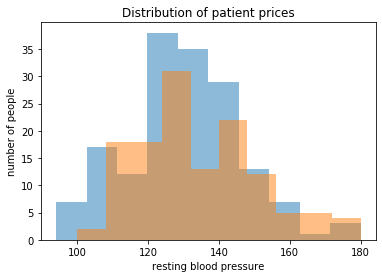

In [36]:
_ = plt.hist(d1, bins=10,alpha=0.5)
_ = plt.hist(d2, bins=10,alpha=0.5)
_ = plt.xlabel('resting blood pressure')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of patient prices')

In [37]:
np.random.seed(47)
N_rep = 10000

def bootstrap_rep(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_rep(data, func)

    return bs_replicates

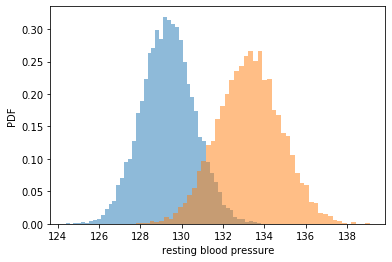

In [76]:
np.random.seed(47)
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicate1 = draw_bs_reps(d1, np.mean, size=10000)
bs_replicate2 = draw_bs_reps(d2, np.mean, size=10000)

# Make a histogram of the results
_ = plt.hist(bs_replicate1, bins=50, density=True,alpha=0.5)
_ = plt.hist(bs_replicate2, bins=50, density=True,alpha=0.5)
_ = plt.xlabel('resting blood pressure')
_ = plt.ylabel('PDF')

In [74]:
# Levene variance test for Control and Treatment groups 
tstat, pval = stats.levene(d1, d2)
print('since',round(pval,3), '>', 0.05 ,'the distribution conforms to equal variance criterion')

since 0.421 > 0.05 the distribution conforms to equal variance criterion


null hypothsis: mean heart disease 

In [145]:
T,pvalue = stats.ttest_ind(d1, d2, equal_var=True)
print(abs(round(T,3)),'>',round(pvalue,3))
print('Reject Null hypothesis, average resting blood pressure in patients with heart disease and those \nwithout are significantly different')

1.984 > 0.048
Reject Null hypothesis, average resting blood pressure in patients with heart disease and those 
without are significantly different


In [54]:
dc1 = df1['cholesterol']
dc2 = df2['cholesterol']

In [56]:
tstat, pval =stats.shapiro(dc1)
print('since',round(pval,3), '>', 0.05 ,'the distribution is non normal') 

since 0.025 > 0.05 the distribution is non normal


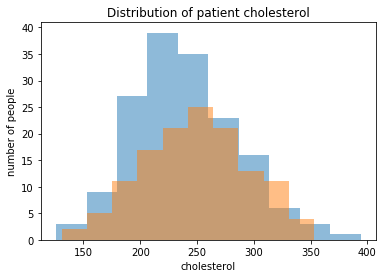

In [137]:
_ = plt.hist(dc1, bins=10,alpha=0.5)
_ = plt.hist(dc2, bins=10,alpha=0.5)
_ = plt.xlabel('cholesterol')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of patient cholesterol')

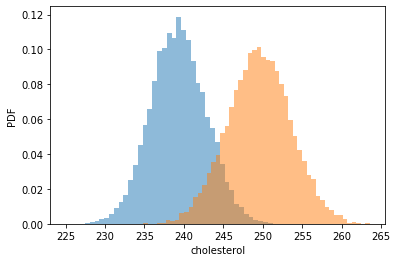

In [77]:
np.random.seed(47)
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicatec1 = draw_bs_reps(dc1, np.mean, size=10000)
bs_replicatec2 = draw_bs_reps(dc2, np.mean, size=10000)

# Make a histogram of the results
_ = plt.hist(bs_replicatec1, bins=50, density=True,alpha=0.5)
_ = plt.hist(bs_replicatec2, bins=50, density=True,alpha=0.5)
_ = plt.xlabel('cholesterol')
_ = plt.ylabel('PDF')

In [73]:
# Levene variance test for Control and Treatment groups 
tstat, pval = stats.levene(dc1, dc2)
print('since',round(pval,3), '>', 0.05 ,'the distribution conforms to equal variance criterion') 

since 0.559 > 0.05 the distribution conforms to equal variance criterion


In [141]:
T,pvalue = stats.ttest_ind(dc1, dc2, equal_var=True)
print(abs(round(T,5)),'>',round(pvalue,5))
print('Reject Null hypothesis, average cholesterol in patients with heart disease and those without are \nsignificantly diferrent')

1.89822 > 0.05866
Reject Null hypothesis, average cholesterol in patients with heart disease and those without are 
significantly diferrent


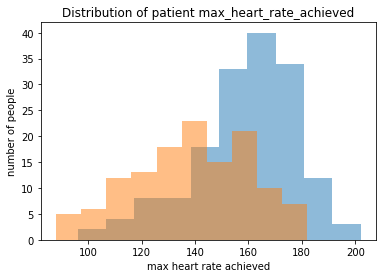

In [78]:
_ = plt.hist(dm1, bins=10,alpha=0.5)
_ = plt.hist(dm2, bins=10,alpha=0.5)
_ = plt.xlabel('max heart rate achieved')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of patient max_heart_rate_achieved')

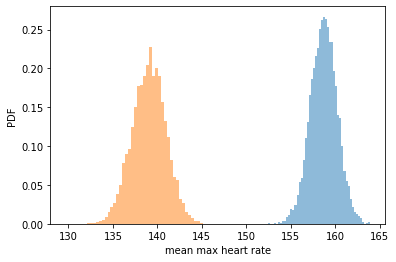

In [66]:
np.random.seed(47)
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicatem1 = draw_bs_reps(dm1, np.mean, size=10000)
bs_replicatem2 = draw_bs_reps(dm2, np.mean, size=10000)

# Make a histogram of the results
_ = plt.hist(bs_replicatem1, bins=50, density=True,alpha=0.5)
_ = plt.hist(bs_replicatem2, bins=50, density=True,alpha=0.5)
_ = plt.xlabel('mean max heart rate')
_ = plt.ylabel('PDF')

In [146]:
# Levene variance test for Control and Treatment groups 
tstat, pval = stats.levene(dm1, dm2)
print('since',round(pval,3), '<', 0.05 ,'the distribution does not conform to equal variance criterion')

since 0.039 < 0.05 the distribution does not conform to equal variance criterion


In [147]:
T,pvalue = stats.ttest_ind(dm1, dm2, equal_var=False)
print(round(T,3),'>',pvalue)
print('Reject Null hypothesis, average maximum heart rate achieved in patients with heart disease \nand those without are significantly different')

8.118 > 1.9398871012644114e-14
Reject Null hypothesis, average maximum heart rate achieved in patients with heart disease 
and those without are significantly different


In [150]:
dm1 = df1['max_heart_rate_achieved']
dm2 = df2['max_heart_rate_achieved']

T,pvalue = stats.ttest_ind(dm1, dm2, equal_var=False)
print(round(T,3),'>',pvalue)
print('Reject Null hypothesis, average maximum heart rate achieved in patients with heart disease and those without are \nsignificantly different')

8.118 > 1.9398871012644114e-14
Reject Null hypothesis, average maximum heart rate achieved in patients with heart disease and those without are 
significantly different


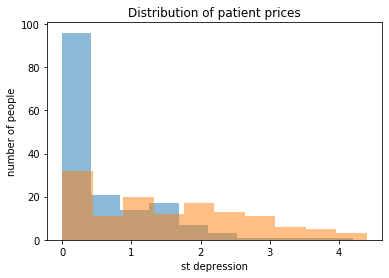

In [132]:
_ = plt.hist(dd1, bins=10,alpha=0.5)
_ = plt.hist(dd2, bins=10,alpha=0.5)
_ = plt.xlabel('st depression')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of patient prices')

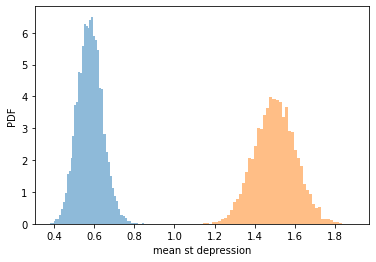

In [133]:
np.random.seed(47)
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicated1 = draw_bs_reps(dd1, np.mean, size=10000)
bs_replicated2 = draw_bs_reps(dd2, np.mean, size=10000)

# Make a histogram of the results
_ = plt.hist(bs_replicated1, bins=50, density=True,alpha=0.5)
_ = plt.hist(bs_replicated2, bins=50, density=True,alpha=0.5)
_ = plt.xlabel('mean st depression')
_ = plt.ylabel('PDF')

In [134]:
# Levene variance test for Control and Treatment groups 
tstat, pval = stats.levene(dd1, dd2)
print('since',round(pval,3), '<', 0.05 ,'the distribution does not conform to equal variance criterion')

since 0.0 < 0.05 the distribution does not conform to equal variance criterion


In [151]:
T,pvalue = stats.ttest_ind(dd1, dd2, equal_var=False)
print(abs(round(T,3)),'>',pvalue)
print('Reject Null hypothesis, average maximum heart rate achieved in patients with heart disease \nand those without are significantly different')

7.678 > 5.599626390584927e-13
Reject Null hypothesis, average maximum heart rate achieved in patients with heart disease 
and those without are significantly different


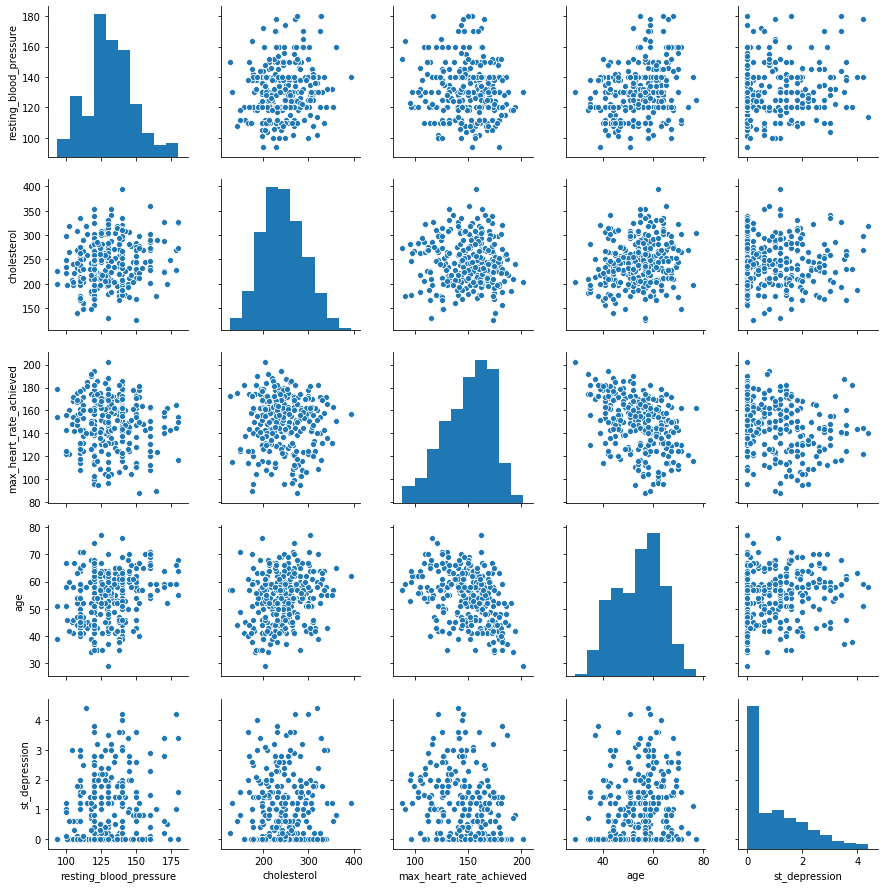

In [100]:
#checking for linear correlation between discrete continuous variables and heart disease
Dis_var_corr = df[['resting_blood_pressure','cholesterol','max_heart_rate_achieved','age','st_depression']]
sns.pairplot(Dis_var_corr)

In [152]:
corr = Dis_var_corr.corr()
corr

,resting_blood_pressure,cholesterol,max_heart_rate_achieved,age,st_depression
resting_blood_pressure,1.000000,0.137923,-0.070210,0.293985,0.152445
cholesterol,0.137923,1.000000,-0.042031,0.191009,0.043844
max_heart_rate_achieved,-0.070210,-0.042031,1.000000,-0.404801,-0.357315
age,0.293985,0.191009,-0.404801,1.000000,0.204395
st_depression,0.152445,0.043844,-0.357315,0.204395,1.000000


Chi square test of independence for categorical data checking whether heart disease is inpendent from fasting blood sugar

null hypothesis: there is independence between heart disease and fasting blood sugar

alternate hypothesis: there is not independence between heart disease and fasting blood sugar

In [81]:
df_fbs = pd.crosstab(df['fasting_blood_sugar'],df['target'])
df_fbs

target,0,1
fasting_blood_sugar,,
0,110,140
1,20,22


In [155]:
alpha = 0.01
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_fbs)
print(alpha ,'<', pval)
print('Fail to reject Null hypothesis, there is no relationship between fasting blood sugar and heart disease')

0.01 < 0.7880101400510057
Fail to reject Null hypothesis, there is no relationship between fasting blood sugar and heart disease


Chi square test of independence for categorical data checking whether heart disease is inpendent from exercise induced angina

null hypothesis: there is independence between heart disease and exercise induced angina

alternate hypothesis: there is not independence between heart disease and exercise induced angina

In [156]:
df_exin = pd.crosstab(df['exercise_induced_angina'],df['target'])
df_exin

target,0,1
exercise_induced_angina,,
0,58,139
1,72,23


In [157]:
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_exin)
print(alpha ,'>', pval)
print('Reject Null hypothesis, there is relationship between exercise induced angina and heart disease')

0.01 > 2.1309655429740874e-13
Reject Null hypothesis, there is relationship between exercise induced angina and heart disease


Chi square test of independence for categorical data checking whether heart disease is inpendent from thalassemia 

null hypothesis: there is independence between heart disease and thalassemia

alternate hypothesis: there is not independence between heart disease and thalassemia

In [86]:
df_thal = pd.crosstab(df.thalassemia,df.target)
df_thal

target,0,1
thalassemia,,
1,12,6
2,35,129
3,83,27


In [87]:
thal_sum = df_thal.sum(axis=0)
thal_pct = df_thal/thal_sum
print(thal_pct)

target              0         1
thalassemia                    
1            0.092308  0.037037
2            0.269231  0.796296
3            0.638462  0.166667


In [153]:
alpha = 0.01
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_thal)
print(alpha ,'>', pval)
print('Reject Null hypothesis, there is relationship between thalassemia and heart disease ')

0.01 > 1.6733144735749217e-18
Reject Null hypothesis, there is relationship between thalassemia and heart disease 


Chi square test of independence for categorical data checking whether heart disease is independent from resting electrocardiographic

null hypothesis: there is independence between heart disease and the resting electrocardiographic levels

alternate hypothesis: there is not independence between heart disease and the resting electrocardiographic levels

In [91]:
df_recg = pd.crosstab(df['rest_ecg'],df['target'])
df_recg

target,0,1
rest_ecg,,
0,74,65
1,53,96
2,3,1


In [124]:
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_recg)
print(alpha ,'<', pval)
print('Fail to reject Null hypothesis, there is no relationship between the resting electrocardiographic \nresults and heart disease')

0.001 < 0.00495990626846124
Fail to reject Null hypothesis, there is no relationship between the resting electrocardiographic 
results and heart disease


Chi square test of independence for categorical data checking whether heart disease is independent from chest pain 

null hypothesis: there is independence between heart disease and chest pain

alternate hypothesis: there is not independence between heart disease and chest pain

In [95]:
df_cp = pd.crosstab(df['chest_pain'],df['target'])
df_cp

target,0,1
chest_pain,,
0,97,39
1,8,41
2,18,66
3,7,16


In [106]:
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_cp)
print(alpha ,'>', pval)
print('Reject Null hypothesis, there is relationship between chest pain and heart disease')

0.001 > 3.112882220479139e-16
Reject Null hypothesis, there is relationship between chest pain and heart disease


Chi square test of independence for categorical data checking whether heart disease is independent from slope of the peak exercise ST segment 

null hypothesis: there is independence between heart disease and the slope of the peak exercise ST segment 

alternate hypothesis: there is not independence between heart disease and the slope of the peak exercise ST segment 

In [98]:
df_sts = pd.crosstab(df['st_slope'],df['target'])
df_sts

target,0,1
st_slope,,
0,9,9
1,87,48
2,34,105


In [107]:
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_sts)
print(alpha ,'>', pval)
print('Reject Null hypothesis, there is relationship between slope of the peak exercise ST segment and heart disease')

0.001 > 2.1069981920553472e-10
Reject Null hypothesis, there is relationship between slope of the peak exercise ST segment and heart disease
